Lab - 09


Practice : Hierarchical Clustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

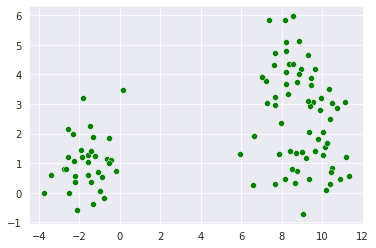

In [2]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std = 1.00)
sns.scatterplot(x=X[:,0], y=X[:,1], c =["green"])

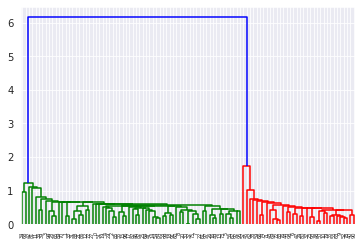

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(X, 'single'),
orientation='top',
distance_sort='descending',
show_leaf_counts=True)

plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_model.fit_predict(X)

array([2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2])

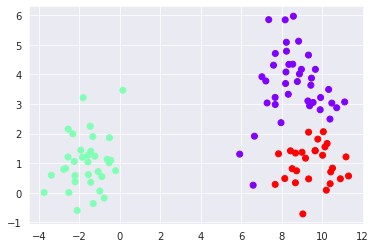

In [5]:
#pring the data points
plt.scatter(x=X[:,0], y=X[:,1], c= hc_model.labels_, cmap='rainbow' )

Practice : K-Means Clustering

In [6]:
# Imports
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
cluster_std=0.2, random_state=0)

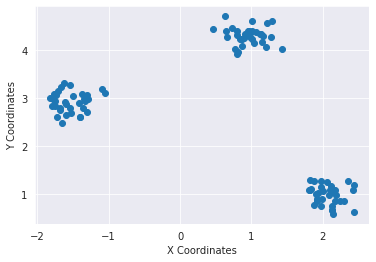

In [7]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [8]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [9]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 0.95164831,  4.28882085],
       [ 2.0720792 ,  0.98848385],
       [-1.538563  ,  2.91165191]])

In [10]:
# Get the cluster labels
kmeans.labels_

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

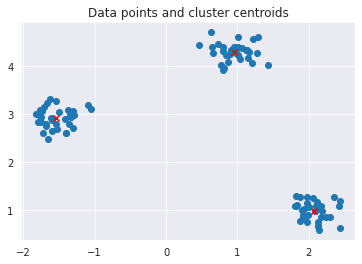

In [11]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [12]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.8816040239688525


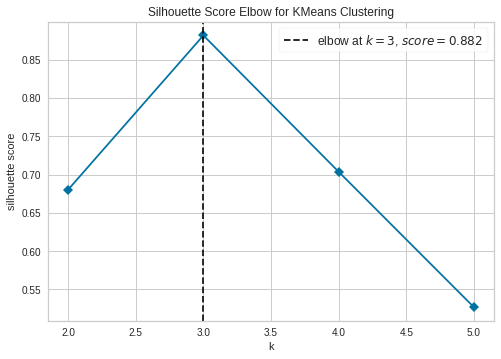

In [14]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

Lab

**On diabetes Dataset :**


Hierarchical clustering

In [15]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [16]:
#Load dataset
diabetes = datasets.load_diabetes()

from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test,target_train,target_test= train_test_split(diabetes.data,diabetes.target, test_size = 0.20, random_state = 98)
print("data_train : ", data_train)
print("data_test : ", data_test)
print("target_train : ", target_train)
print("target_test : ", target_test)

data_train :  [[ 0.07440129 -0.04464164  0.08540807 ... -0.00259226  0.00620932
   0.08590655]
 [ 0.06713621  0.05068012 -0.00620595 ... -0.0763945   0.0594238
   0.05276969]
 [ 0.00538306 -0.04464164 -0.04824063 ... -0.03949338 -0.05140054
  -0.05906719]
 ...
 [ 0.04534098 -0.04464164  0.0519959  ...  0.03430886  0.03723201
   0.01963284]
 [-0.0382074   0.05068012  0.00457217 ...  0.03430886  0.01630495
  -0.0010777 ]
 [-0.06000263  0.05068012 -0.0105172  ...  0.0158583  -0.00991896
  -0.03421455]]
data_test :  [[-0.04183994 -0.04464164  0.04121778 -0.02632783 -0.03183992 -0.03043668
  -0.03603757  0.00294291  0.03365681 -0.01764613]
 [ 0.01991321  0.05068012  0.00996123  0.01842948  0.01494247  0.04471895
  -0.06180903  0.07120998  0.00943641 -0.0632093 ]
 [-0.08906294 -0.04464164 -0.06117437 -0.02632783 -0.05523112 -0.05454912
   0.04127682 -0.0763945  -0.09393565 -0.05492509]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.0226

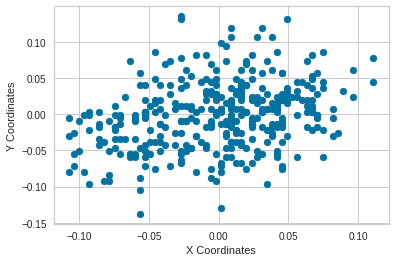

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

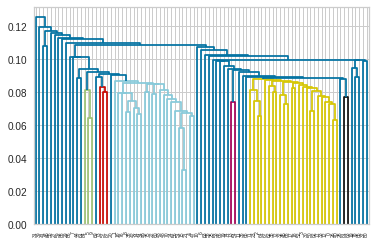

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(data_test, 'single'),orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

y_pred :  [0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1]


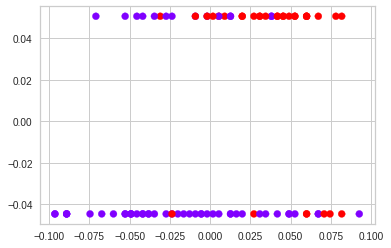

In [19]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y_pred = hc_model.fit_predict(data_test)
print("y_pred : ", y_pred)

#pring the data points
plt.scatter(x=data_test[:,0], y=data_test[:,1], c= hc_model.labels_, cmap='rainbow' )

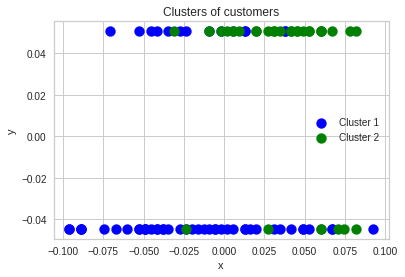

In [20]:
#visulaizing the clusters  
plt.scatter(data_test[y_pred == 0, 0], data_test[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(data_test[y_pred == 1, 0], data_test[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.title('Clusters of customers')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()
plt.show()

K_Means clustering

In [21]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [24]:
#Load dataset
diabetes = datasets.load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [25]:
#split data
from sklearn.model_selection import train_test_split
data_train, data_test,target_train,target_test= train_test_split(diabetes.data, diabetes.target, test_size = 0.20, random_state =98)
print("data_train : ", data_train)
print("data_test : ", data_test)
print("target_train : ", target_train)
print("target_test : ", target_test)

data_train :  [[ 0.07440129 -0.04464164  0.08540807 ... -0.00259226  0.00620932
   0.08590655]
 [ 0.06713621  0.05068012 -0.00620595 ... -0.0763945   0.0594238
   0.05276969]
 [ 0.00538306 -0.04464164 -0.04824063 ... -0.03949338 -0.05140054
  -0.05906719]
 ...
 [ 0.04534098 -0.04464164  0.0519959  ...  0.03430886  0.03723201
   0.01963284]
 [-0.0382074   0.05068012  0.00457217 ...  0.03430886  0.01630495
  -0.0010777 ]
 [-0.06000263  0.05068012 -0.0105172  ...  0.0158583  -0.00991896
  -0.03421455]]
data_test :  [[-0.04183994 -0.04464164  0.04121778 -0.02632783 -0.03183992 -0.03043668
  -0.03603757  0.00294291  0.03365681 -0.01764613]
 [ 0.01991321  0.05068012  0.00996123  0.01842948  0.01494247  0.04471895
  -0.06180903  0.07120998  0.00943641 -0.0632093 ]
 [-0.08906294 -0.04464164 -0.06117437 -0.02632783 -0.05523112 -0.05454912
   0.04127682 -0.0763945  -0.09393565 -0.05492509]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.0226

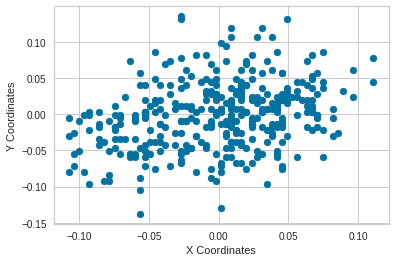

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

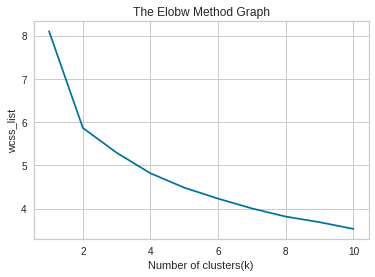

In [27]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 98)  
    kmeans.fit(data_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [28]:
# Specify the number of clusters (2) and fit the data X
kmeans = KMeans(n_clusters=2, random_state=98).fit(data_train)

# Get the cluster centroids
kmeans.cluster_centers_

# Get the cluster labels
kmeans.labels_

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,

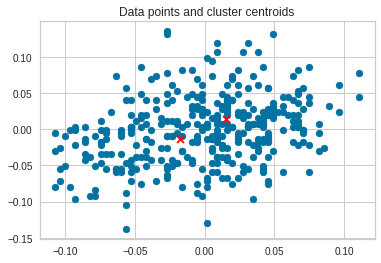

In [29]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [30]:
# Calculate silhouette_score && install yellowbrick
from sklearn.metrics import silhouette_score
print(silhouette_score(data_train, kmeans.labels_))

0.23368403246003605


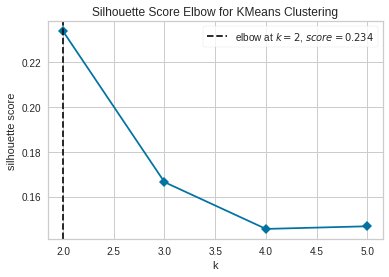

In [32]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=98)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(data_train)
visualizer.poof()

In [33]:
target_test.reshape(1,-1)
y_pred = kmeans.fit_predict(data_test) 
print("y_pred : ", y_pred)

y_pred :  [1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0]


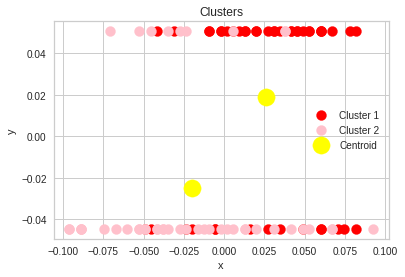

In [34]:
plt.scatter(data_test[y_pred == 0, 0], data_test[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(data_test[y_pred == 1, 0], data_test[y_pred == 1, 1], s = 100, c = 'pink', label = 'Cluster 2') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()

On iris Dataset :

Hierarchical clustering 

In [35]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [36]:
#Load dataset
iris = datasets.load_iris()

In [37]:
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size = 0.20, random_state = 98)
print("data_train : ", data_train)
print("data_test : ", data_test)
print("target_train : ", target_train)
print("target_test : ", target_test)

data_train :  [[5.8 2.7 5.1 1.9]
 [4.8 3.4 1.6 0.2]
 [7.2 3.6 6.1 2.5]
 [6.9 3.1 5.4 2.1]
 [6.6 2.9 4.6 1.3]
 [5.  3.3 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.1 3.  4.9 1.8]
 [6.2 2.2 4.5 1.5]
 [7.7 3.  6.1 2.3]
 [7.7 3.8 6.7 2.2]
 [6.4 3.2 4.5 1.5]
 [4.6 3.6 1.  0.2]
 [6.3 3.3 6.  2.5]
 [6.2 2.8 4.8 1.8]
 [5.2 3.4 1.4 0.2]
 [5.4 3.4 1.5 0.4]
 [6.  2.2 4.  1. ]
 [5.5 2.4 3.8 1.1]
 [4.9 3.  1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [5.7 2.8 4.1 1.3]
 [6.  2.7 5.1 1.6]
 [5.1 3.8 1.9 0.4]
 [5.  3.4 1.5 0.2]
 [4.8 3.  1.4 0.3]
 [6.1 2.6 5.6 1.4]
 [4.3 3.  1.1 0.1]
 [4.9 2.5 4.5 1.7]
 [5.1 3.7 1.5 0.4]
 [5.  3.6 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [6.5 2.8 4.6 1.5]
 [5.4 3.9 1.3 0.4]
 [6.5 3.2 5.1 2. ]
 [5.4 3.4 1.7 0.2]
 [5.1 3.4 1.5 0.2]
 [5.2 3.5 1.5 0.2]
 [5.6 3.  4.5 1.5]
 [5.8 2.6 4.  1.2]
 [6.4 3.2 5.3 2.3]
 [5.5 3.5 1.3 0.2]
 [4.6 3.2 1.4 0.2]
 [4.9 3.6 1.4 0.1]
 [6.1 2.9 4.7 1.4]
 [6.  3.  4.8 1.8]
 [5.6 2.5 3.9 1.1]
 [5.8 2.8 5.1 2.4]
 [6.4 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [6.  2.2 5.  1.5

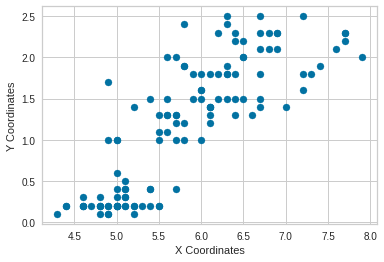

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

y_pred :  [0 0 0 0 1 0 0 0 2 1 0 0 0 1 0 2 2 0 0 0 0 2 1 1 2 1 1 0 2 1]


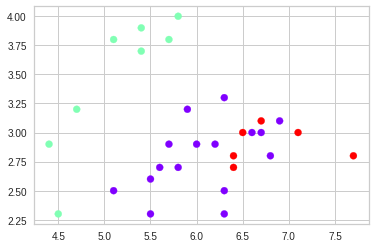

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_pred = hc_model.fit_predict(data_test)
print("y_pred : ", y_pred)

#pringing the data points
plt.scatter(x=data_test[:,0], y=data_test[:,1], c= hc_model.labels_, cmap='rainbow' )

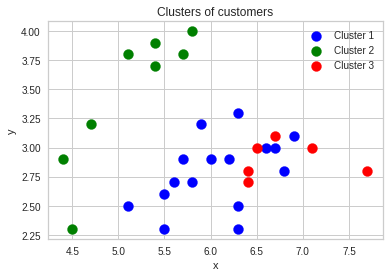

In [40]:
#visulaizing the clusters  
plt.scatter(data_test[y_pred == 0, 0], data_test[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(data_test[y_pred == 1, 0], data_test[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(data_test[y_pred== 2, 0], data_test[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.title('Clusters of customers')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()

K-Means clustrering

In [41]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [43]:
# Load dataset
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [45]:
# splitting data
from sklearn.model_selection import train_test_split
data_train, data_test,target_train,target_test= train_test_split(iris.data,
iris.target, test_size = 0.20, random_state =98 )

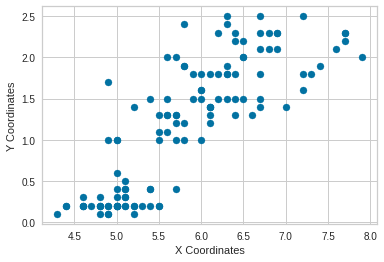

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

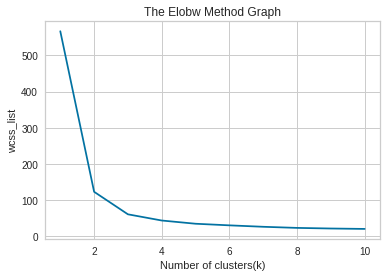

In [47]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 98)  
    kmeans.fit(data_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [48]:
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=98).fit(data_train)

# Get the cluster centroids
kmeans.cluster_centers_

array([[5.88125   , 2.74583333, 4.41458333, 1.45208333],
       [4.98333333, 3.42380952, 1.4547619 , 0.2452381 ],
       [6.86333333, 3.11      , 5.79      , 2.10666667]])

In [49]:
# Get the cluster labels
kmeans.labels_

array([0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

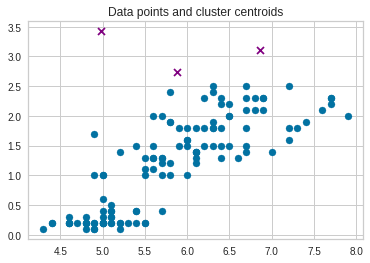

In [50]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='purple', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [51]:
# Calculate silhouette_score && install yellowbrick
from sklearn.metrics import silhouette_score
print(silhouette_score(data_train, kmeans.labels_))

0.570976897173972


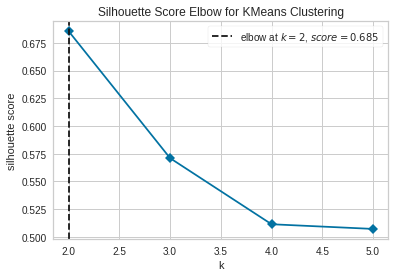

In [52]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=98)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(data_train)
visualizer.poof()

In [53]:
target_test.reshape(1,-1)
y_pred = kmeans.fit_predict(data_test) 
print("y_pred : ", y_pred)

y_pred :  [0 0 0 2 1 0 0 0 2 1 2 0 0 1 0 2 2 0 0 2 0 2 1 1 2 1 1 0 2 1]


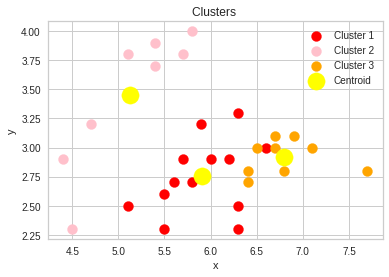

In [54]:
plt.scatter(data_test[y_pred == 0, 0], data_test[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_test[y_pred == 1, 0], data_test[y_pred == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(data_test[y_pred == 2, 0], data_test[y_pred == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters ')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()